In [1]:
# imports
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

import numpy as np
import random
import sympy as sym
import winsound
from scipy.stats import beta
from sklearn.metrics import accuracy_score
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import winsound

In [2]:
duration = 1000  # milliseconds
freq = 440  # Hz

In [3]:
# function to count the number of the infected neighbores of i at t:\n",
def CNbr(G,X,n,T):
    C=np.zeros((T,n))
    for t in range(T):
        C[t]=G[t].dot(X.T[t])
    return C.T

In [4]:
def transition(X,t,G,j,param):
    alpha_=param[0]
    beta_=param[1]
    gama_=param[2]
    c=CNbr(G,X,n,T)[j][t]
    k=X[j,t]-2*X[j,t+1]
    if k==0:
        return 1-alpha_-beta_*c
    elif k==-2:
        return alpha_+beta_*c
    elif k==1:
        return gama_
    else:
        return 1-gama_

In [296]:
# Function to obtain the very initial sample of X, using forwad sampling:\n",
def Forward_Sampling(T,n,G,param):
    alpha_=param[0]
    beta_=param[1]
    gama_=param[2]
    p0=P
    p1=np.round((1-P),2)
    x=int(np.round(((1-P)*n),0))
    X=np.zeros((n,T))  
    idx=np.random.choice(range(n), x)
    X[idx,0]=1
    for t in range(T-1):
        for i in range(n):
            c=CNbr(G,X,n,T)[i,t]
            if X[i,t]==0:
                p1=(alpha_+beta_*c)
            else:
                p1=(1-gama_)
            np.random.binomial( 1, p1,size=None)
            X[i,t+1]=np.random.binomial( 1, p1,size=None)
    return X 

In [607]:
# function to sample X, using Gibbs Sampling:\n",
def Sample_hidden_state(pos_probs,X,G,Y,param,t):
    x=np.zeros((n,T))
    
    alpha_=param[0]
    beta_=param[1]
    gama_=param[2]
    theta_0_0=param[3]
    theta_1_0=param[4] 
    theta_0_1=param[5]
    theta_1_1=param[6] 
    theta_0_2=param[7]
    theta_1_2=param[8]
    theta_0_3=param[9]
    theta_1_3=param[10] 
    theta_0_4=param[11]
    theta_1_4=param[12] 
    theta_0_5=param[13]
    theta_1_5=param[14] 
    for i in range(n):
        
        if t==0:
            p0,p1=P,np.round(1-P,2)
        else:
            p0,p1=1,1
        pow00=int(Y[0,i,t] == 0)   
        pow10=int(Y[0,i,t] == 1)
        pow01=int(Y[1,i,t] == 0)  
        pow11=int(Y[1,i,t] == 1)    
        pow02=int(Y[2,i,t] == 0)      
        pow12=int(Y[2,i,t] == 1)
        pow03=int(Y[3,i,t] == 0)  
        pow13=int(Y[3,i,t] == 1)
        pow04=int(Y[4,i,t] == 0)  
        pow14=int(Y[4,i,t] == 1)    
        pow05=int(Y[5,i,t] == 0)      
        pow15=int(Y[5,i,t] == 1)     
        p0=p0*np.round(1-theta_0_0,3)**pow00
        p1=p1*np.round(1-theta_1_0,3)**pow00
        p0=p0*np.round(1-theta_0_1,3)**pow01
        p1=p1*np.round(1-theta_1_1,3)**pow01
        p0=p0*np.round(1-theta_0_2,3)**pow02
        p1=p1*np.round(1-theta_1_2,3)**pow02
        p0=p0*np.round(1-theta_0_3,3)**pow03
        p1=p1*np.round(1-theta_1_3,3)**pow03
        p0=p0*np.round(1-theta_0_4,3)**pow04
        p1=p1*np.round(1-theta_1_4,3)**pow04
        p0=p0*np.round(1-theta_0_5,3)**pow05
        p1=p1*np.round(1-theta_1_5,3)**pow05
        p0=p0*(theta_0_0)**pow10
        p1=p1*theta_1_0**pow10
        p0=p0*(theta_0_1)**pow11
        p1=p1*theta_1_1**pow11
        p0=p0*(theta_0_2)**pow12
        p1=p1*theta_1_2**pow12
        p0=p0*(theta_0_3)**pow13
        p1=p1*theta_1_3**pow13
        p0=p0*(theta_0_4)**pow14
        p1=p1*theta_1_4**pow14
        p0=p0*(theta_0_5)**pow15
        p1=p1*theta_1_5**pow15
              
       # emission probability when sample is X[i,t]=0:
    
        X[i,t]=0
        p_0=p0
        if (t==0):
            c=CNbr(G,X,n,T)[i][t]
        else:  
            c=CNbr(G,X,n,T)[i][t-1]
              
       # transition probability of i from t-1 to t, when sample is X[i,t]=0:
       
        if t!=0:
            if X[i,t-1]==0:
                p_0=p_0*(1-alpha_-beta_*c)
            else:
                p_0=p_0*gama_
    
       # emission probability when sample is X[i,t]=1:
        X[i,t]=1
        p_1=p1
        if (t==0):
            c=CNbr(G,X,n,T)[i][t]
        else:    
            c=CNbr(G,X,n,T)[i][t-1]
        if t!=0:
        # transition probability of i, when sample is X[i,t]=1:
            if X[i,t-1]==0:
                p_1=p_1*(alpha_+beta_*c)
            else:
                p_1=p_1*(1-gama_)
        # transition probability of i's neighbores, from t to t+1:
        if t!=T-1:        
            X[i,t]=0
            for j in np.where(G[t][i]==1)[0]:
                p_0=p_0*transition(X,t,G,j,param)
            X[i,t]=1
            for j in np.where(G[t][i]==1)[0]:
                p_1=p_1*transition(X,t,G,j,param)
        if p_0+p_1==0:            
            l=0.5
        else:
            l=p_1/(p_0+p_1)
        X[i,t]=np.random.binomial( 1,  l,size=None) 
        x[i,t]=np.random.binomial( 1,  l,size=None)
        pos_probs[i,t]=l
    return X ,pos_probs   ,x

In [527]:
# Gibbs sampling to obtain X, as new sample of posterior distribution:
def Calculate_X(K,T,X,G,Y,param):
    pos_probs=np.zeros((n,T))
    for k in range(K):
        for t in range(T):
            hidden_states=Sample_hidden_state(pos_probs,X,G,Y,param,t)
            X=hidden_states[0]
            pos_probs=hidden_states[1]
            x=hidden_states[2]
    return X , pos_probs, x

In [8]:
def Accuracy_(X,X_):
    Xflat = np.hstack(np.hstack(X))
    X_flat = np.hstack(np.hstack(X_))
    result=accuracy_score(Xflat, X_flat,normalize=True)
    return result

In [9]:
# function to define auxiliary variable R_(n,t):
def R_(G,X,params):
    alpha_,beta_,gama_=params[0],params[1],params[2]
    
    R=np.zeros((n,T))+1
    for i in range(n):
        for t in range(T-1):
            infected_neighbore=int(CNbr(G,X,n,T)[i,t])
            pr_a=alpha_/(alpha_+beta_*infected_neighbore)
            pr_b=beta_/(alpha_+beta_*infected_neighbore)
            v=np.random.multinomial(1, [pr_a]+[pr_b]*infected_neighbore)
            if (X[i][t]==0)&(X[i][t+1]==1):
                if v[0]==1:
                    R[i,t]=0
                else: 
                    R[i,t]=2

In [10]:
# function to sample new parameters and update parameters:
def Params(R,G,X,n,T,Y,param):
        
    alpha_=param[0]
    beta_=param[1]
    gama_=param[2]
    #theta_0_0=param[3]
    #theta_1_0=param[4] 
    #theta_0_1=param[5]
    #theta_1_1=param[6] 
    #theta_0_2=param[7]
    #theta_1_2=param[8]
    #theta_0_3=param[9]
    #theta_1_3=param[10] 
    #theta_0_4=param[11]
    #theta_1_4=param[12] 
    #theta_0_5=param[13]
    #TP0=np.sum(np.multiply(X,Y[0]))
    #FP0=np.count_nonzero(X-Y[0]==-1)
    #TP1=np.sum(np.multiply(X,Y[1]))
    #FP1=np.count_nonzero(X-Y[1]==-1)
    #TP2=np.sum(np.multiply(X,Y[2]))
    #FP2=np.count_nonzero(X-Y[2]==-1)
    #TP3=np.sum(np.multiply(X,Y[3]))
    #FP3=np.count_nonzero(X-Y[3]==-1)
    #TP4=np.sum(np.multiply(X,Y[4]))
    #FP4=np.count_nonzero(X-Y[4]==-1)
    #TP5=np.sum(np.multiply(X,Y[5]))
    #FP5=np.count_nonzero(X-Y[5]==-1)    
    infR=np.array(CNbr(G,X,n,T))
    alpha_=Sample_alpha(a_alpha +  np.count_nonzero(R==0) , b_alpha +np.count_nonzero(X==0)- np.count_nonzero(R==0))
    beta_=Sample_beta(a_beta + np.count_nonzero(R==2) , b_beta +np.sum(np.multiply((1-X),infR))-np.count_nonzero(R==2))
    gama_=Sample_gama(a_gama +(T-1)*n-np.count_nonzero(X[:,:-1]-X[:,1:]-1), b_gama+np.sum(X)-(T-1)*n+np.count_nonzero(X[:,:-1]-X[:,1:]-1))
    theta_0_0=.01#Sample_theta00( a_teta00+FP0,b_teta00+np.count_nonzero(X==0)-FP0)
    theta_1_0=.99#Sample_theta10( a_teta10+TP0,b_teta10+np.count_nonzero(X==1)-TP0)
    theta_0_1=.01#Sample_theta01( a_teta01+FP1,b_teta01+np.count_nonzero(X==0)-FP1)
    theta_1_1=.99#Sample_theta11( a_teta11+TP1,b_teta11+np.count_nonzero(X==1)-TP1)
    theta_0_2=.01#Sample_theta02( a_teta02+FP2,b_teta02+np.count_nonzero(X==0)-FP2)
    theta_1_2=.99#Sample_theta12( a_teta12+TP2,b_teta12+np.count_nonzero(X==1)-TP2)
    theta_0_3=.01#Sample_theta03( a_teta03+FP3,b_teta03+np.count_nonzero(X==0)-FP3)
    theta_1_3=.99#Sample_theta13( a_teta13+TP3,b_teta13+np.count_nonzero(X==1)-TP3)
    theta_0_4=.01#Sample_theta04( a_teta04+FP4,b_teta04+np.count_nonzero(X==0)-FP4)
    theta_1_4=.99#Sample_theta14( a_teta14+TP4,b_teta14+np.count_nonzero(X==1)-TP4)
    theta_0_5=.01#Sample_theta05( a_teta05+FP5,b_teta05+np.count_nonzero(X==0)-FP5)
    theta_1_5=.99#Sample_theta15( a_teta15+TP5,b_teta15+np.count_nonzero(X==1)-TP5)

    R=R_(G,X,params)
    param=np.array([alpha_,beta_,gama_,theta_0_0,theta_1_0,theta_0_1,theta_1_1,theta_0_2,theta_1_2,theta_0_3,theta_1_3,theta_0_4,theta_1_4,theta_0_5,theta_1_5])
    return param,R

# function to sample from beta distribution

In [613]:
def Sample_alpha(a_alpha, b_alpha):
    for i in beta.rvs(a_alpha, b_alpha, size=10000):
        #print("al",i,a_alpha,b_alpha)
        if (i>0.001)&(i<0.01):
            alpha_=round(i,3)
            break
    return alpha_    

In [614]:
def Sample_beta(a_beta, b_beta):
    for i in beta.rvs(a_beta, b_beta, size=10000):
        #print("be",a_beta, b_beta)
        if (i>0.0001)&(i<0.051):
            beta_=round(i,4)
            break
    return beta_ 

In [615]:
def Sample_gama(a_gama,b_gama):
    for i in beta.rvs(a_gama, b_gama, size=10000):
        #print("g",i,a_gama,b_gama)
        if (i>0.02)&(i<0.7):
            gama_=round(i,3)
            break
    return gama_  

In [616]:
def Sample_theta00(a_teta00, b_teta00):
    for i in beta.rvs(a_teta00, b_teta00, size=10000):
        #print("t00",a_teta00,b_teta00)
        if (i>0.01)&(i<0.3):
            theta_0_0=round(i,3)    
            break
    return theta_0_0 

In [15]:
def Sample_theta10(a_teta10, b_teta10):
    for i in beta.rvs(a_teta10, b_teta10, size=10000):
        #print("t10",i,a_teta10, b_teta10)
        if .993>round(i,3)>0.5:
            theta_1_0=round(i,3)
            break
    return theta_1_0 

In [16]:
def Sample_theta01(a_teta01, b_teta01):
    for i in beta.rvs(a_teta01, b_teta01, size=10000):
        #print("t01",i,a_teta01, b_teta01)
        if (i>0.01)&(i<0.3):
            theta_0_1=round(i,3)
            break
    return theta_0_1

In [17]:
def Sample_theta11(a_teta11, b_teta11):
    for i in beta.rvs(a_teta11, b_teta11, size=10000):
        #print("t11",i,a_teta11, b_teta11)
        if .993>round(i,3)>0.5:
            theta_1_1=round(i,3)
            break
    return theta_1_1

In [18]:
def Sample_theta02(a_teta02, b_teta02):
    for i in beta.rvs(a_teta02, b_teta02, size=10000):
        #print("t02",i,a_teta02, b_teta02)
        if (i>0.01)&(i<0.3):
            theta_0_2=round(i,3)
            break
    return theta_0_2 

In [19]:
def Sample_theta12(a_teta12, b_teta12):
    for i in beta.rvs(a_teta12, b_teta12, size=10000):
        #print("t12",i,a_teta12,b_teta12,i)
        if .993>round(i,3)>0.5:
            theta_1_2=round(i,3)
            break
    return theta_1_2

In [20]:
def Sample_theta03(a_teta03, b_teta03):
    for i in beta.rvs(a_teta03, b_teta03, size=10000):
        #print("t03",i,a_teta03, b_teta03)
        if (i>0.01)&(i<0.3):
            theta_0_3=round(i,3)
            break
    return theta_0_3  

In [21]:
def Sample_theta13(a_teta13, b_teta13):
    for i in beta.rvs(a_teta13, b_teta13, size=10000):
        #print("t13",i,a_teta13, b_teta13)
        if .993>round(i,3)>0.5:
            theta_1_3=round(i,3)
            break
    return theta_1_3

In [22]:
 def Sample_theta04(a_teta04, b_teta04):
    for i in beta.rvs(a_teta04, b_teta04, size=10000):
        #print("t04",i,a_teta04, b_teta04)
        if (i>0.01)&(i<0.3):
            theta_0_4=round(i,3)
            break
    return theta_0_4  

In [23]:
def Sample_theta14(a_teta14, b_teta14):
    for i in beta.rvs(a_teta14, b_teta14, size=10000):
        #print("t14",i,a_teta14, b_teta14)
        if .993>round(i,3)>0.5:
            theta_1_4=round(i,3)
            break
    return theta_1_4

In [24]:
def Sample_theta05(a_teta05, b_teta05):
    for i in beta.rvs(a_teta05, b_teta05, size=10000):
        #print("t05",i,a_teta05, b_teta05)
        if (i>0.01)&(i<0.3):
            theta_0_5=round(i,3)
            break
    return theta_0_5

In [25]:
def Sample_theta15(a_teta15, b_teta15):
    for i in beta.rvs(a_teta15, b_teta15, size=10000):
        #print("t15",a_teta15, b_teta15)
        if .993>round(i,3)>0.5:
            theta_1_5=round(i,3)
            break
    return theta_1_5

In [26]:
# initialize parameters for beta distributions:
a_alpha=1
b_alpha=1
a_beta=1
b_beta=5
a_gama=1
b_gama=5
    
a_teta00=1
b_teta00=5
a_teta10=800
b_teta10=1
a_teta01=1
b_teta01=5
a_teta11=800
b_teta11=1
a_teta02=1
b_teta02=5
a_teta12=800
b_teta12=1
a_teta03=1
b_teta03=5
a_teta13=800
b_teta13=1
a_teta04=1
b_teta04=5
a_teta14=800
b_teta14=1
a_teta05=1
b_teta05=5
a_teta15=800
b_teta15=1
# infection rate
P=1
hyper_params=[a_alpha,b_alpha,a_beta,b_beta,a_gama,b_gama,a_teta00,b_teta00,a_teta10,b_teta10,a_teta01,b_teta01,a_teta11,b_teta11,a_teta02,b_teta02,a_teta12,b_teta12,a_teta03,b_teta03,a_teta13,b_teta13,a_teta04,b_teta04,a_teta14,b_teta14,a_teta05,b_teta05,a_teta15,b_teta15]
   

In [617]:
# function to sample infection and emission parameters(alpha,beta,betaf,gama,teta0,teta1)\n",
def initialize_parameters(hyper_params):
    a_alpha=hyper_params[0]
    b_alpha=hyper_params[1]
    a_beta=hyper_params[2]
    b_beta=hyper_params[3]
    a_gama=hyper_params[4]
    b_gama=hyper_params[5]
    a_teta00=hyper_params[6]
    b_teta00=hyper_params[7]
    a_teta10=hyper_params[8]
    b_teta10=hyper_params[9]
    a_teta01=hyper_params[10]
    b_teta01=hyper_params[11]
    a_teta11=hyper_params[12]
    b_teta11=hyper_params[13]
    a_teta02=hyper_params[14]
    b_teta02=hyper_params[15]
    a_teta12=hyper_params[16]
    b_teta12=hyper_params[17]
    a_teta03=hyper_params[18]
    b_teta03=hyper_params[19]
    a_teta13=hyper_params[20]
    b_teta13=hyper_params[21]
    a_teta04=hyper_params[22]
    b_teta04=hyper_params[23]
    a_teta14=hyper_params[24]
    b_teta14=hyper_params[25]
    a_teta05=hyper_params[26]
    b_teta05=hyper_params[27]
    a_teta15=hyper_params[28]
    b_teta15=hyper_params[29]
    alpha_=Sample_alpha(a_alpha, b_alpha)
    beta_=Sample_beta(a_beta, b_beta)
    gama_=Sample_gama(a_gama,b_gama)
    theta_0_0=Sample_theta00(a_teta00, b_teta00)
    theta_1_0=Sample_theta10(a_teta10, b_teta10)
    theta_0_1=Sample_theta01(a_teta01, b_teta01)
    theta_1_1=Sample_theta11(a_teta11, b_teta11)
    theta_0_2=Sample_theta02(a_teta02, b_teta02)
    theta_1_2=Sample_theta12(a_teta12, b_teta12)
   
    theta_0_3=Sample_theta03(a_teta03, b_teta03)
    theta_1_3=Sample_theta13(a_teta13, b_teta13)
    
    theta_0_4=Sample_theta04(a_teta04, b_teta04)
    theta_1_4=Sample_theta14(a_teta14, b_teta14)
    theta_0_5=Sample_theta05(a_teta05, b_teta05)
    theta_1_5=Sample_theta15(a_teta15, b_teta15)
    params=np.array([alpha_,beta_,gama_,theta_0_0,theta_1_0,theta_0_1,theta_1_1,theta_0_2,theta_1_2,theta_0_3,theta_1_3,theta_0_4,theta_1_4,theta_0_5,theta_1_5])
    return params

In [576]:
# function to add noise to observation vector, in order to test the model performance:\n",
def add_noise(Y,noise_percent):
    Y_noisey=np.copy(Y)
    for turn in range(6):
        index=random.sample(range(0,n*T ), int(n*T*noise_percent))
        for j in index:
            feature=random.randint(0, 5)
            i=int(j/T)
            t=j-i*T
            Y_noisey[feature,i,t]=(1+Y[feature,i,t])*(1-Y[feature,i,t])
    return Y_noisey  

In [792]:
# load data sets for Y,G and generate first J samples of X:
%store -r Y
%store -r G
n,T=G.shape[1],G.shape[0]
U=5
K=5
J=5
params=initialize_parameters(hyper_params)
params#=np.array([0.006 , 0.0168, 0.305 , 0.045 , 0.992 , 0.096 , 0.992 , 0.185 ,
   #    0.992 , 0.192 , 0.991 , 0.251 , 0.99  , 0.289 , 0.992 ])

array([0.003 , 0.0276, 0.117 , 0.092 , 0.992 , 0.22  , 0.992 , 0.023 ,
       0.989 , 0.104 , 0.992 , 0.171 , 0.99  , 0.012 , 0.992 ])

In [725]:
Y_noisey=add_noise(Y_true,.2)
Accuracy_(Y_true,Y_noisey)

0.8161375661375662

In [770]:
# Main code to run entire Gibbs sampling algorithm U times:
def Gibbs_train(hyper_params,T,n,G,Y,U,K,J):
    xx=[]
    XX=[]
    prob=[]
    for j in range(J):
        params=initialize_parameters(hyper_params)
        print(params)
        X=Forward_Sampling(T,n,G,params)
        print("Forward_Sampling",j)
        print("Start Gibbs Sampling:")
        mylist=[]
        accuracy=[]
        for i in range(U):
            print("************************************************ Iteration",i,"************************************************")
            print("Current Parameters:",params)
            now = datetime.now()
            current_time = now.strftime("%H:%M:%S")
            print("Current Time is :", current_time)
            cal=Calculate_X(K,T,X,G,Y,params)
            X=cal[0]
            pos_probs=cal[1]
            x=cal[2]
            R=R_(G,X,params)
            if i!=U-1:
                prm=Params(R,G,X,n,T,Y,hyper_params)
                params=prm[0]
                R=prm[1]
        xx.append(x)
        XX.append(X) 
        prob.append(pos_probs)
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print("Current Time is :", current_time)
    winsound.Beep(freq, duration) 
    return np.array(XX) ,np.array(prob), params   

In [793]:
Train=Gibbs_train(hyper_params,T,n,G,Y,U,K,J)

[0.003  0.0045 0.443  0.183  0.991  0.123  0.992  0.034  0.992  0.011
 0.992  0.194  0.992  0.11   0.991 ]
Forward_Sampling 0
Start Gibbs Sampling:
************************************************ Iteration 0 ************************************************
Current Parameters: [0.003  0.0045 0.443  0.183  0.991  0.123  0.992  0.034  0.992  0.011
 0.992  0.194  0.992  0.11   0.991 ]
Current Time is : 08:33:52
************************************************ Iteration 1 ************************************************
Current Parameters: [0.001  0.0018 0.553  0.01   0.99   0.01   0.99   0.01   0.99   0.01
 0.99   0.01   0.99   0.01   0.99  ]
Current Time is : 08:35:36
************************************************ Iteration 2 ************************************************
Current Parameters: [0.002 0.02  0.643 0.01  0.99  0.01  0.99  0.01  0.99  0.01  0.99  0.01
 0.99  0.01  0.99 ]
Current Time is : 08:37:21
************************************************ Iteration 3 ***************

In [589]:
def estimate_Y(X,param):
    theta_0_0=param[3]
    theta_1_0=param[4]
    theta_0_1=param[5]
    theta_1_1=param[6] 
    theta_0_2=param[7]
    theta_1_2=param[8]
    theta_0_3=param[9]
    theta_1_3=param[10] 
    theta_0_4=param[11]
    theta_1_4=param[12]
    theta_0_5=param[13]
    theta_1_5=param[14]
    theta0=[theta_0_0,theta_0_1,theta_0_2,theta_0_3,theta_0_4,theta_0_5]
    theta1=[theta_1_0,theta_1_1,theta_1_2,theta_1_3,theta_1_4,theta_1_5]
    Y_=np.zeros((6,n,T))
    prob=np.zeros((6,n,T))
    for t in range(T):
        for i in range(n):
            for j in range(6):
                p1=theta0[j]**(1-X[i,t])*(theta1[j])**X[i,t]
                p0=(1-theta0[j])**(1-X[i,t])*(1-theta1[j])**X[i,t]
                l=p1/(p1+p0)
                Y_[j,i,t]=np.random.binomial( 1, l,size=None)
                prob[j,i,t]=l
    return Y_, prob

In [802]:
X=Train[0]
pos_probs=Train[1]
params=Train[2]

In [803]:
print(X.shape,pos_probs.shape)

(5, 63, 66) (5, 63, 66)


In [811]:
np.sum(X[:])

189.0

In [812]:
params

array([0.001 , 0.0047, 0.468 , 0.01  , 0.99  , 0.01  , 0.99  , 0.01  ,
       0.99  , 0.01  , 0.99  , 0.01  , 0.99  , 0.01  , 0.99  ])

In [806]:
Y_estimate=estimate_Y(X[4],params)[0]
Y_prob=estimate_Y(X[4],params)[1]

In [569]:
def Gibbs_test(params,T,n,G,Y,K,J):
       
    acc=[]  
    XX=[]
    prob=[]
    for j in range(J):
        #params=initialize_parameters(hyper_params)
        print(params)
        X=Forward_Sampling(T,n,G,params)
        print("Forward_Sampling",j,"\n",X)
        print("Start Gibbs Sampling:")
        cal=Calculate_X(K,T,X,G,Y,params)
        X=cal[0]
        label="Sample:"+str(j)
        pos_probs=cal[1]
        prob.append(pos_probs)    
        XX.append(X)    
        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")
        print("Current Time is :", current_time)
    winsound.Beep(freq, duration) 
    return np.array(XX),prob
   

In [813]:
Test=Gibbs_test(params,T,n,G,Y_estimate,K,J)

[0.001  0.0047 0.468  0.01   0.99   0.01   0.99   0.01   0.99   0.01
 0.99   0.01   0.99   0.01   0.99  ]
Forward_Sampling 0 
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Start Gibbs Sampling:
Current Time is : 09:30:57
[0.001  0.0047 0.468  0.01   0.99   0.01   0.99   0.01   0.99   0.01
 0.99   0.01   0.99   0.01   0.99  ]
Forward_Sampling 1 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Start Gibbs Sampling:
Current Time is : 09:32:22
[0.001  0.0047 0.468  0.01   0.99   0.01   0.99   0.01   0.99   0.01
 0.99   0.01   0.99   0.01   0.99  ]
Forward_Sampling 2 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Start Gibbs Sampling:
Current Time is : 09:33:48
[0.0

In [789]:
Accuracy_(Y_true[2],Y_estimate[2])

0.7510822510822511

In [759]:
Y_prob[0]

array([[0.108, 0.108, 0.108, ..., 0.108, 0.108, 0.108],
       [0.108, 0.108, 0.108, ..., 0.108, 0.108, 0.108],
       [0.108, 0.108, 0.108, ..., 0.108, 0.108, 0.108],
       ...,
       [0.108, 0.108, 0.108, ..., 0.108, 0.108, 0.108],
       [0.108, 0.108, 0.108, ..., 0.108, 0.108, 0.108],
       [0.108, 0.108, 0.108, ..., 0.108, 0.108, 0.108]])

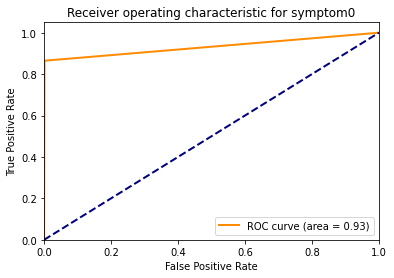

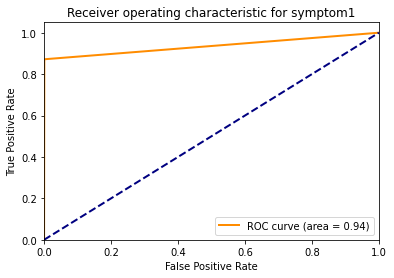

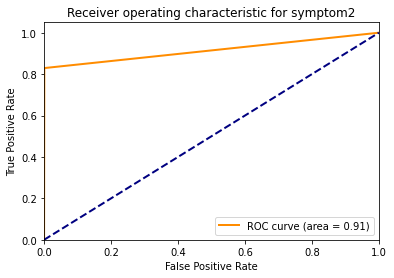

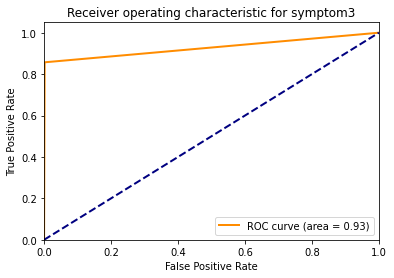

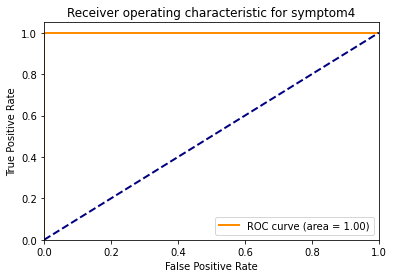

In [815]:
plt.figure()
lw = 2
for i in range(5):
    y_score=np.hstack(Test[0][i])
    y_test=np.hstack(Train[0][i])
    fpr, tpr, thresholds = roc_curve(y_test, y_score,pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic for symptom"+str(i))
    plt.legend(loc="lower right")
    plt.show()

In [608]:
pos_probs=Test[1][0]
y_score=np.hstack(pos_probs)
y_score.shape

(5346,)

In [609]:
X_=Train[0][0]
y_test=np.hstack(X_true)
y_test.shape

(5346,)

In [610]:
fpr, tpr, thresholds = roc_curve(y_test, y_score,pos_label=1)
roc_auc = auc(fpr, tpr)

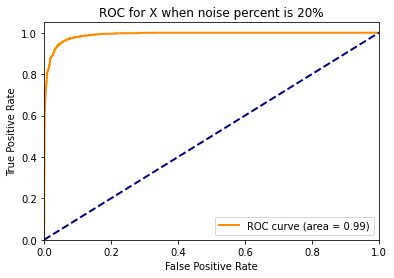

In [612]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for X when noise percent is 20%")
plt.legend(loc="lower right")
plt.show()

In [700]:
# Synthetized data:
# Function to generates synthetic dataset
def Synthetic_Data(n,T,y,params):
    Y_=np.zeros((6,n,T))
    x_=np.zeros((n,T))
    alpha_,beta_,gama_,theta_0_0,theta_1_0,theta_0_1,theta_1_1,theta_0_2,theta_1_2,theta_0_3,theta_1_3,theta_0_4,theta_1_4,theta_0_5,theta_1_5=params[0],params[1],params[2],params[3],params[4],params[5],params[6],params[7],params[8],params[9],params[10],params[11],params[12],params[13],params[14]
    teta_0=[theta_0_0,theta_0_1,theta_0_2,theta_0_3,theta_0_4,theta_0_5]
    teta_1=[theta_1_0,theta_1_1,theta_1_2,theta_1_3,theta_1_4,theta_1_5]
    P=1
    x=int(np.round(((1-P)*n),0))
    X=np.zeros((n,T))
    idx=np.random.choice(range(n), x)
    X[idx,0]=1
    x_[idx,0]=1-P
    # Random social network
    #G=[]
    #for j in range(T):
     #   g=np.identity(n,dtype=int)
      #  for i in range(n):
       #     indx=np.random.choice(range(i,n), y)
        #    for inx in indx:
         #       g[i,inx]=1  
          #      g[inx,i]=1
        #G.append(g)
    #G=np.array(G)
     
    # Synthetize X, using params,G and transition probability:
    for t in range(T-1):
        for i in range(n):
            c=CNbr(G,X,n,T)[i,t]
            if X[i,t]==0:
                p1=alpha_+beta_*c
            else:
                p1=1-gama_
            
            X[i,t+1]=np.random.binomial( 1, p1,size=None) 
            x_[i,t+1]=p1
    #X=(x_>0.2)+0       
    # Synthetize Y, using params, G, X, emission probability:
    for t in range(T):
        for i in range(n):
            for j in range(6):
                if X[i,t]==0:
                    teta0=teta_0[j]
                    Y_[j,i,t]=np.random.binomial( 1, teta0,size=None) 
                else:
                    teta1=teta_1[j]
                    Y_[j,i,t]=np.random.binomial( 1, teta1,size=None) 
    return G,Y_,X   ,x_       

In [211]:
params=np.array([.005,.045,.3,.01,.99,.01,.99,.01,.99,.01,.99,.01,.99,.01,.99])

In [698]:
%store -r G

In [699]:
G.shape

(66, 63, 63)

In [701]:
# Generate synthetic data,G ,Y:
n,T,y=63,66,4
synthetic_data=Synthetic_Data(n,T,y,params)
G,Y_true,X_true,xx =synthetic_data[0],synthetic_data[1],synthetic_data[2],synthetic_data[3]

In [711]:
Train=Gibbs_train(hyper_params,T,n,G[:56],Y_true[:,:,:56],U,K,J)

[0.004  0.0019 0.07   0.083  0.99   0.149  0.991  0.262  0.992  0.209
 0.991  0.088  0.992  0.029  0.992 ]
Forward_Sampling 0
Start Gibbs Sampling:
************************************************ Iteration 0 ************************************************
Current Parameters: [0.004  0.0019 0.07   0.083  0.99   0.149  0.991  0.262  0.992  0.209
 0.991  0.088  0.992  0.029  0.992 ]
Current Time is : 22:48:34
X [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
p [[8.50549560e-11 3.72891408e-13 1.20012520e-12 ... 1.82483231e-13
  1.82483231e-13 4.12866669e-15]
 [6.30892062e-12 1.31266705e-09 2.89058154e-16 ... 2.87403917e-16
  1.82134455e-13 4.12866669e-15]
 [1.80629168e-14 2.34507541e-10 1.20473476e-12 ... 3.72891408e-13
  1.20923266e-13 1.71416546e-11]
 ...
 [8.10771519e-09 3.72891408e-13 6.45188111e-07 ... 1.19328758e-12
  6.41502811e-07 1.72056532e-12]
 [5.15833175e-05 1.20923266

In [632]:
Y_test=add_noise(Y_true,.2)

In [712]:
T=66

In [713]:
Test=Gibbs_test(params,T,n,G,Y_true,K,J)

[0.005  0.0318 0.235  0.037  0.992  0.123  0.992  0.185  0.992  0.258
 0.988  0.27   0.992  0.266  0.992 ]
Forward_Sampling 0 
 [[1. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Start Gibbs Sampling:
Current Time is : 22:49:42


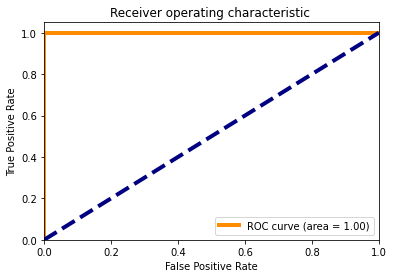

In [714]:
for j in range(J):
    pos_probs=Test[1][j]
    y_score=np.hstack(pos_probs)
    y_test=np.hstack(X_true)
    fpr, tpr, thresholds = roc_curve(y_test, y_score,pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 4
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic ")
    plt.legend(loc="lower right")
    plt.show()

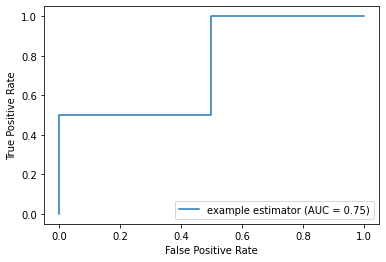

In [624]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
y = np.array([0, 0, 1, 1])
pred = np.array([0.1, 0.53, 0.45, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

plt.show()

In [635]:
X_true

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [636]:
X_test=Test[0]
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [696]:
def show_TPR_by_time(X_true,X_score,T):
    TP,FN,TPR=np.zeros((T)),np.zeros((T)),np.zeros((T))
    for t in range(T):
        TP[t]=np.count_nonzero(np.multiply(X_true,X_score).T[t]==1)
        FN[t]=np.count_nonzero((X_true-2*X_score).T[t]==1)
        if (TP[t]+FN[t])!=0:
            TPR[t]=TP[t]/(TP[t]+FN[t])
        #print(TP[t],FN[t])
        #plt.plot(t,TPR[t],'go--', linewidth=2, markersize=1)  
    plt.plot(range(T),TPR) 
    plt.show()    

In [691]:
a=np.array([[1,0],[1,1]])
b=np.array([[1,1],[1,0]])

In [692]:
a

array([[1, 0],
       [1, 1]])

In [693]:
b

array([[1, 1],
       [1, 0]])

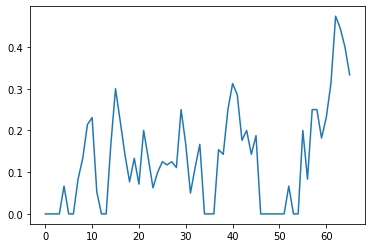

In [823]:
show_TPR_by_time(Y_true[2],estimate_Y(X_true,params)[0][2],T)

In [717]:
for i in range(6):
    print(Accuracy_(Y_true[i],estimate_Y(X_true,params)[0][i]))


0.9244829244829245
0.7845117845117845
0.714045214045214
0.626022126022126
0.6180856180856181
0.6267436267436267


In [816]:
plt.savefig('my_plot.png')

<Figure size 432x288 with 0 Axes>

In [820]:
plt.show()

In [819]:
plt.close()